Candidate: 168

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

#models
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#encode and scalars

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score




# 1) Data preparation:

In this section, I am firstly inserting the header since the dataset came without header.


In [2]:
column_names = ['class',
                'cap-shape',
                'cap-surface',
                'cap-color',
                'bruises?',
                'odor',
                'gill-attachment',
                'gill-spacing',
                'gill-size',
                'gill-color',
                'stalk-shape',
                'stalk-root',
                'stalk-surface-above-ring',
                'stalk-surface-below-ring',
                'stalk-color-above-ring',
                'stalk-color-below-ring',
                'veil-type',
                'veil-color',
                'ring-number',
                'ring-type',
                'spore-print-color',
                'population',
                'habitat']


mushroom_data = pd.read_csv("agaricus-lepiota.csv", header = None, names = column_names)

mushroom_data.head()



,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 2) Pre-processing

in this part of the code i am checking for duplicates

In [3]:
# Check for duplicate rows
duplicates = mushroom_data.duplicated()

# Count the number of duplicate rows
duplicate_count = mushroom_data.sum()
duplicate_count

#there are no duplicates so I am continuing with the predata processing.

class                       peepeeeepeeeepeeepppepeeepeeeeepeeeeepeeeeepee...
cap-shape                   xxbxxxbbxbxxbxxsfxxxbxbbbfxxfxbxxxbxsxxbbxxxxx...
cap-surface                 sssysysyysyysyfffsyssyyyssyyfssyyyyffyfsyyfysy...
cap-color                   nywwgywwwyyyywngwnwnynywwwywnyywynyygnyyyynwyw...
bruises?                    ttttftttttttttffftttttttttttftttttttftttttfttt...
odor                        palpnaalpalaapnnnpppaplalpalnalpllllnpalalnpaa...
gill-attachment             ffffffffffffffffffffffffffffffffffffffffffffff...
gill-spacing                ccccwcccccccccwcwccccccccccccwcccccwccwccccccc...
gill-size                   nbbnbbbbnbbbbnbnbnnnbnbbbnbbnnbnbbbnnnnbbbnnbb...
gill-color                  kknnkngnpggnwknkknnkknkwgnnwkngknpnwkwpknngpwn...
stalk-shape                 eeeeteeeeeeeeeteteeeeeeeeeeeeteeeeeteeteeeeeee...
stalk-root                  ecceecccecccceeeeeeececcceccebcecrcbeebccreecc...
stalk-surface-above-ring    ssssssssssssssssssssssssssssssssssss

Then I am checking if the header passed for all the columns by using the header function and then using the shape to check how many rows and columns there are in the datasett.

In [4]:
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Then I want to further examine the relationship between cap-shape, cap-color and class. The code below creates a categorical plot using the Seaborn library to visualize the relationship between the 'cap-shape', 'cap-color', and 'class' variables in the 'mushrooms' dataset.

<Figure size 1400x600 with 0 Axes>

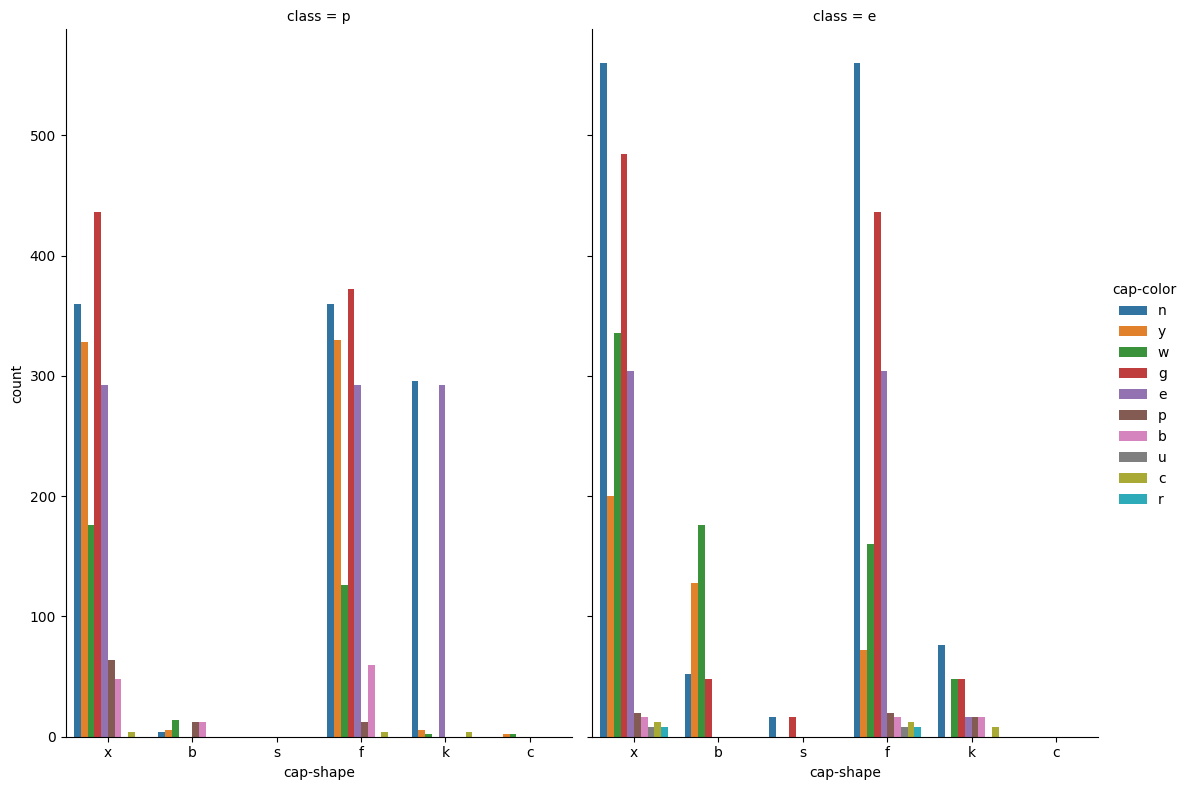

In [5]:
plt.figure(figsize=(14,6))
g= sns.catplot(x='cap-shape', hue='cap-color', col='class', data=mushroom_data, kind='count', height=8, aspect=.7)

### 2.1) Missing values

The dataset contains missing values, the missing values are shown in the form of ? in the data set, therfore first I am checking how many and where the missing values are.

In [6]:
mushroom_data[mushroom_data== '?'].count()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises?                       0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [7]:
mushroom_data['stalk-root']

0       e
1       c
2       c
3       e
4       e
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, Length: 8124, dtype: object

It can be seen from the two cells above that there are missing values in the code and they are only in the stalk-root column.

Then the next step is to decide what to do with the missing values. There were different options, one of them were to use KNN imputer and imput the missing values, however it was determined to remove the stalk-root column instead  by first converting the missing values to NaN and then dropping the column.

In [8]:
# Replace '?' with np.nan in 'stalk-root' column
mushroom_data['stalk-root'] = mushroom_data['stalk-root'].replace('?', np.nan)

# Display the 'stalk-root' column
print(mushroom_data['stalk-root'])


0         e
1         c
2         c
3         e
4         e
       ... 
8119    NaN
8120    NaN
8121    NaN
8122    NaN
8123    NaN
Name: stalk-root, Length: 8124, dtype: object


In [9]:
# Drop the 'stalk-root' column
mushroom_data = mushroom_data.drop(columns=['stalk-root'])


In [10]:
mushroom_data

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### 2.2) Cramer's V

Cramer's V measures association between two categorical variables where 0 is no association and 1 is perfect association. Based on running the Cramer's V I have identified which columns I need to further evaluate to see if they are necessary in the prediction of mushroom edibility. So the further analysis will first be done to columns with a low association to the Class column,  so an association of less or equal to 0.25. Then look at the columns with high association and see if it is possible to remove the columns and it does not affect the important columns in the prediction of mushroom edibility.

In [11]:

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Replace 'mushroom_data' with your actual DataFrame name
variables = mushroom_data.columns

cramers_v_matrix2 = pd.DataFrame(columns=variables)
for var1 in variables:
    for var2 in variables:
        cramers_v_matrix2.loc[var1, var2] = cramers_v(mushroom_data[var1], mushroom_data[var2])

# Set the Pandas option to display all columns
#pd.set_option('display.max_columns', None)

print("Cramér's V Matrix:")
print(cramers_v_matrix2)



C:\Users\shani\AppData\Local\Temp\ipykernel_10504\1993365525.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\shani\AppData\Local\Temp\ipykernel_10504\1993365525.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\shani\AppData\Local\Temp\ipykernel_10504\1993365525.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\shani\AppData\Local\Temp\ipykernel_10504\1993365525.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\shani\AppData\Local\Temp\ipykernel_10504\1993365525.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\shani\AppData\Local\Temp\ipykernel_10504\1993365525.py:10: RuntimeWarning: i

Cramér's V Matrix:
                             class cap-shape cap-surface cap-color  bruises?  \
class                     0.999753   0.24433    0.195997  0.215889  0.501188   
cap-shape                  0.24433       1.0    0.202242  0.168221  0.254415   
cap-surface               0.195997  0.202242         1.0  0.222841  0.133004   
cap-color                 0.215889  0.168221    0.222841       1.0  0.215101   
bruises?                  0.501188  0.254415    0.133004  0.215101  0.999747   
odor                      0.970558  0.243577    0.236416  0.330517  0.660201   
gill-attachment           0.127951  0.152989    0.209977  0.245736  0.136129   
gill-spacing              0.347897  0.077849    0.337696  0.398593  0.298946   
gill-size                 0.539677  0.345956    0.276765  0.469156  0.369182   
gill-color                0.679877  0.232274    0.255023  0.280178  0.649324   
stalk-shape                0.10117  0.306119    0.076395  0.594499  0.098495   
stalk-surface-above-r

C:\Users\shani\AppData\Local\Temp\ipykernel_10504\1993365525.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


### 2.3) Encoding

The data set is categorical data, to be able to further evaluate the data set the information needs to be preprocessed, which is done using the method of encoding, which represents representing every single piece of data in a way that a computer can understand. In this exercise I am encoding using the method of one-hot encoding.
One-hot Encoding is a type of vector representation in which all of the elements in a vector are 0, except for one, which has 1 as its value, where 1 represents a boolean specifying a category of the element

In [12]:
encoded_columns = []

for column in mushroom_data.columns:
    encoded = pd.get_dummies(mushroom_data[column], prefix=column)
    encoded_columns.append(encoded)

# Concatenate all the encoded DataFrames along the columns axis
one_hot_encoded_mushroom_data = pd.concat(encoded_columns, axis=1)


In [13]:
one_hot_encoded_mushroom_data

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [14]:
one_hot_encoded_mushroom_data.columns.tolist()

['class_e',
 'class_p',
 'cap-shape_b',
 'cap-shape_c',
 'cap-shape_f',
 'cap-shape_k',
 'cap-shape_s',
 'cap-shape_x',
 'cap-surface_f',
 'cap-surface_g',
 'cap-surface_s',
 'cap-surface_y',
 'cap-color_b',
 'cap-color_c',
 'cap-color_e',
 'cap-color_g',
 'cap-color_n',
 'cap-color_p',
 'cap-color_r',
 'cap-color_u',
 'cap-color_w',
 'cap-color_y',
 'bruises?_f',
 'bruises?_t',
 'odor_a',
 'odor_c',
 'odor_f',
 'odor_l',
 'odor_m',
 'odor_n',
 'odor_p',
 'odor_s',
 'odor_y',
 'gill-attachment_a',
 'gill-attachment_f',
 'gill-spacing_c',
 'gill-spacing_w',
 'gill-size_b',
 'gill-size_n',
 'gill-color_b',
 'gill-color_e',
 'gill-color_g',
 'gill-color_h',
 'gill-color_k',
 'gill-color_n',
 'gill-color_o',
 'gill-color_p',
 'gill-color_r',
 'gill-color_u',
 'gill-color_w',
 'gill-color_y',
 'stalk-shape_e',
 'stalk-shape_t',
 'stalk-surface-above-ring_f',
 'stalk-surface-above-ring_k',
 'stalk-surface-above-ring_s',
 'stalk-surface-above-ring_y',
 'stalk-surface-below-ring_f',
 'stalk-su

In the cell below I am removing the column class_p because it contains the same information as the column class_e with oppsite sign. Therefore, I saw no need to have both columns when continuing with the data analysis.

In [15]:
one_hot_encoded_mushroom_data.drop(columns=['class_p'])

,class_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


# 3 visualisations:

In the first visualisation I am checking the percentage of edible to poisinous mushrooms in the data set.

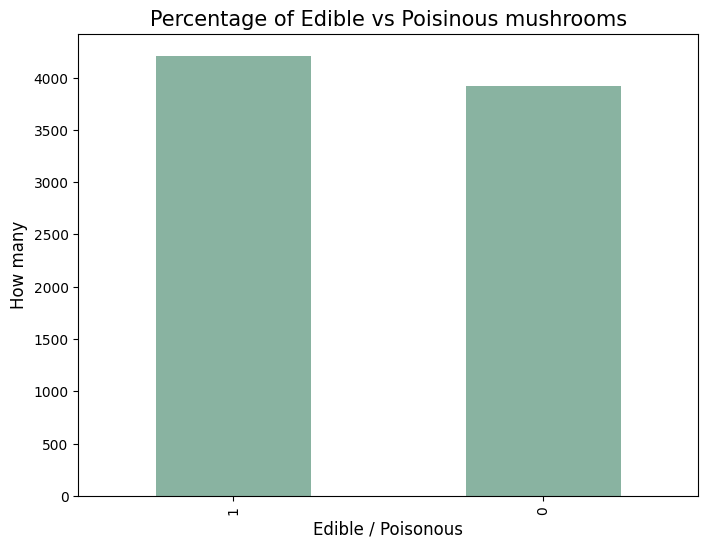

In [16]:
#Counting values within each class
category_dist = one_hot_encoded_mushroom_data["class_e"].value_counts()

#Defining chart
plt.figure(figsize=(8,6))
category_dist.plot(kind='bar', color = '#89b3a1')
plt.grid()
plt.xlabel("Edible / Poisonous", fontsize = 12)
plt.ylabel("How many", fontsize = 12)
plt.title("Percentage of Edible vs Poisinous mushrooms", fontsize = 15)
plt.grid(False)
plt.show()

In the next section I am putting Cramer's V association in a aheatmap to visualize the columns to further examine and compared the columns compared to the class column and had an association less than 0.20 were removed as they did not help in the prediction of edible/poisinous mushrooms. 

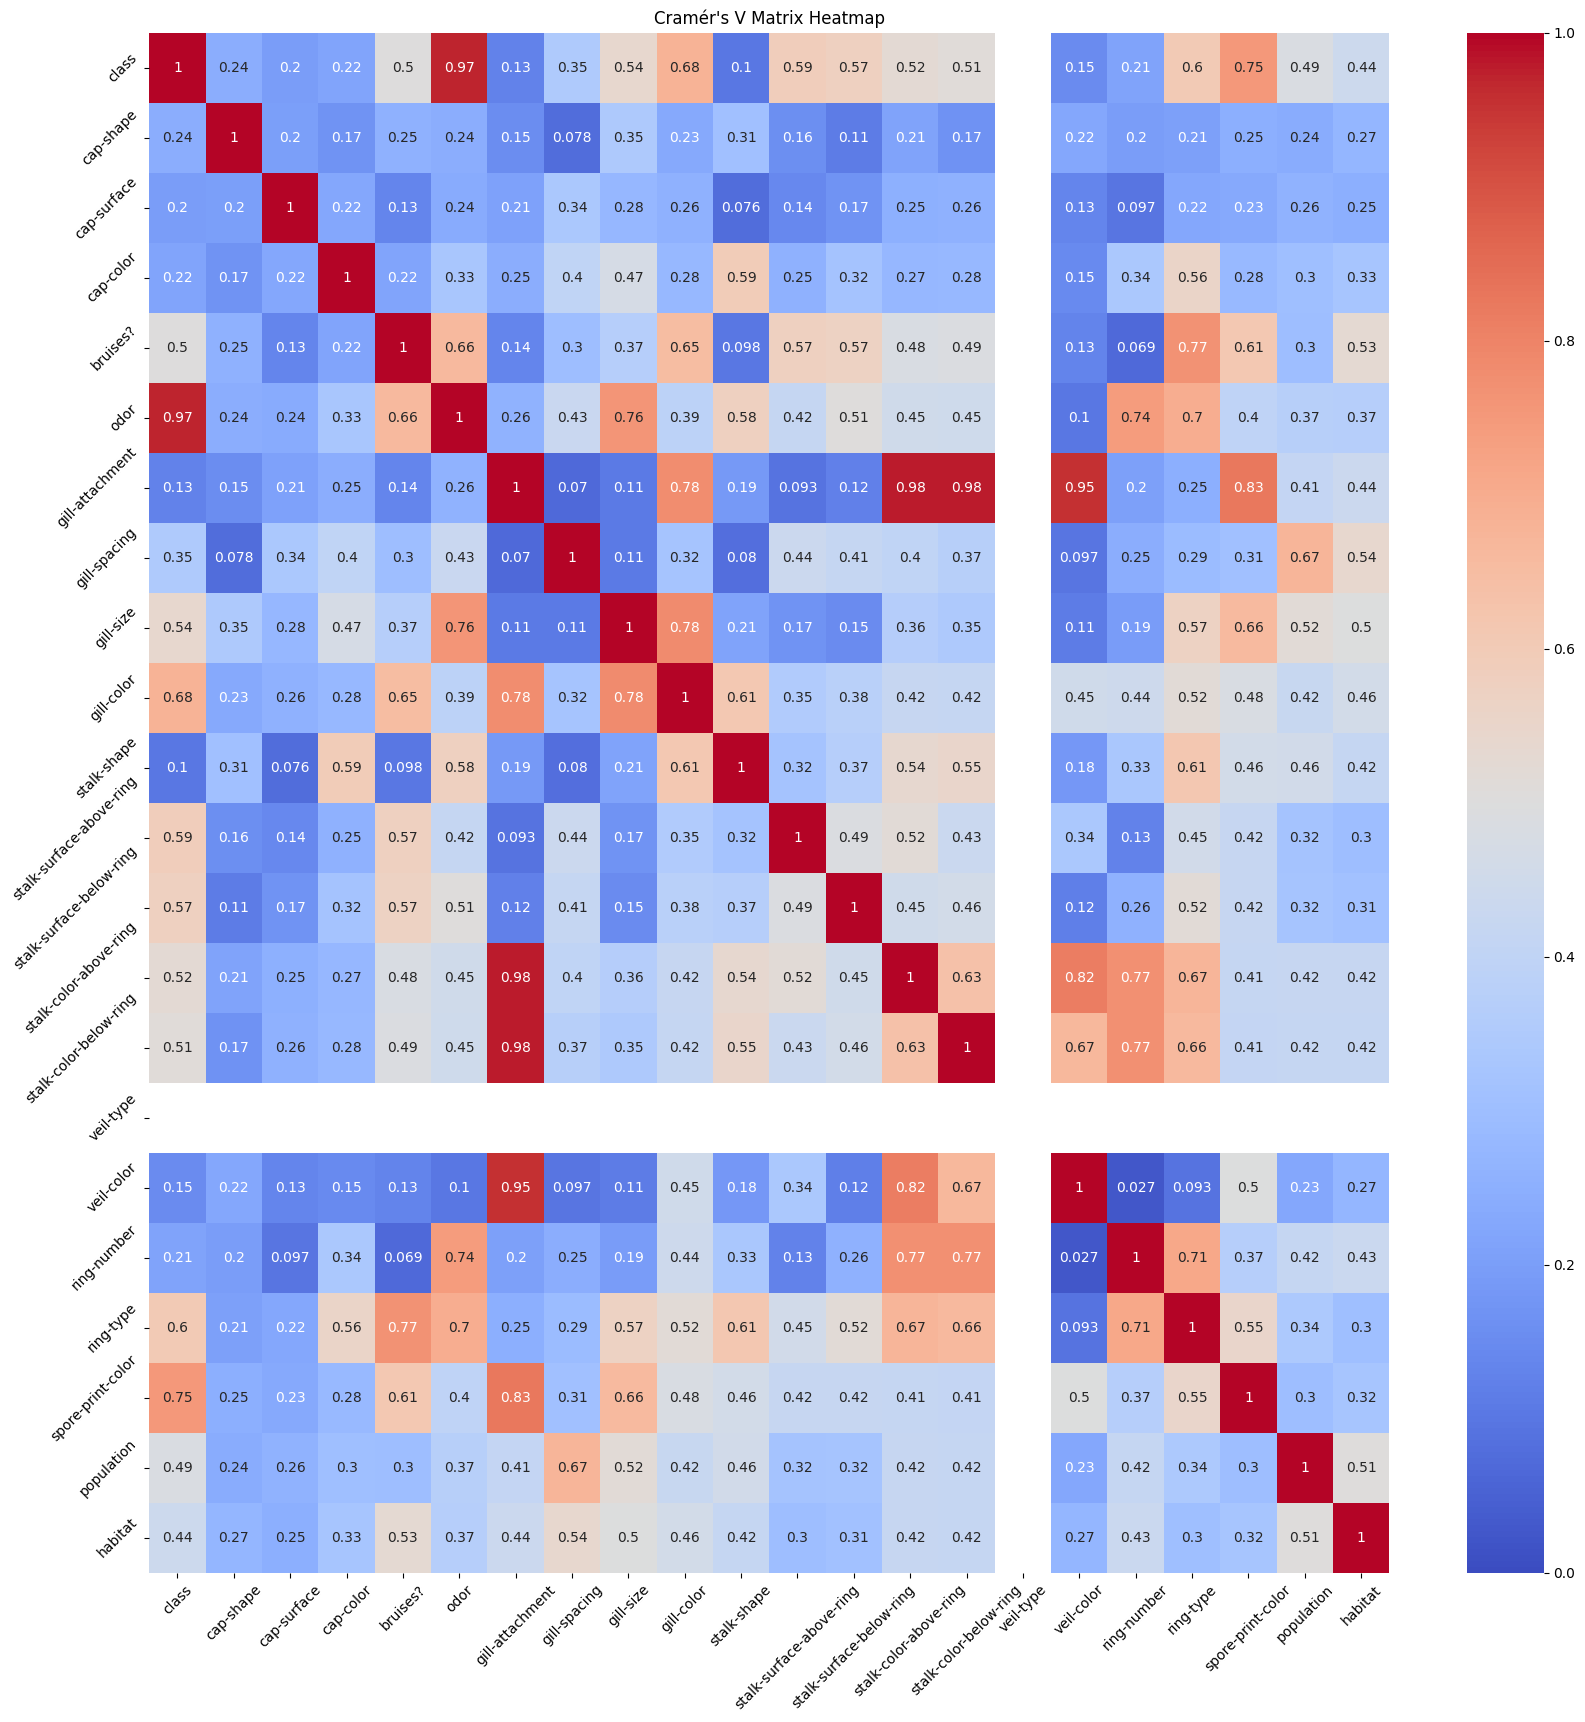

In [17]:
# Convert the DataFrame to numeric data type
cramers_v_matrix2_numeric = cramers_v_matrix2.astype(float)

# Create a heatmap of the Cramér's V matrix
plt.figure(figsize=(20, 20))  # Set the figure size (optional)
sns.heatmap(cramers_v_matrix2_numeric, annot=True, cmap="coolwarm", vmin=0, vmax=1)

# Customize the chart
plt.title("Cramér's V Matrix Heatmap")
plt.xticks(rotation=45)  # Rotate x-axis labels (optional)
plt.yticks(rotation=45)  # Rotate y-axis labels (optional)

# Show the heatmap
plt.show()


In this it can be seen in the column veil-type is empty so I am dropping it

In [18]:
one_hot_encoded_mushroom_data = one_hot_encoded_mushroom_data.drop(columns=['veil-type_p'])

In [19]:
cramers_v_matrix2_numeric["class"]

class                       0.999753
cap-shape                   0.244330
cap-surface                 0.195997
cap-color                   0.215889
bruises?                    0.501188
odor                        0.970558
gill-attachment             0.127951
gill-spacing                0.347897
gill-size                   0.539677
gill-color                  0.679877
stalk-shape                 0.101170
stalk-surface-above-ring    0.587666
stalk-surface-below-ring    0.574551
stalk-color-above-ring      0.523943
stalk-color-below-ring      0.513799
veil-type                        NaN
veil-color                  0.152222
ring-number                 0.214212
ring-type                   0.602900
spore-print-color           0.752036
population                  0.486775
habitat                     0.439323
Name: class, dtype: float64

In [20]:
#the columns I am to remove since they do not have a high corrolation. Checking for the column with less than 0.2 correlation and removing these columns.
pois_col=cramers_v_matrix2_numeric[cramers_v_matrix2_numeric["class"] < 0.2].index
pois_col


Index(['cap-surface', 'gill-attachment', 'stalk-shape', 'veil-color'], dtype='object')

In [21]:
pois = ['cap-surface_f',
 'cap-surface_g',
 'cap-surface_s',
 'cap-surface_y','gill-attachment_a',
 'gill-attachment_f', 'stalk-shape_e',
 'stalk-shape_t','veil-color_n',
 'veil-color_o',
 'veil-color_w',
 'veil-color_y']

In [22]:
new_encoded_mushroom_data = one_hot_encoded_mushroom_data.drop(columns=pois)
new_encoded_mushroom_data

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-color_b,cap-color_c,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


# 3 Data processing

The next section, I am splitting the data set into train, validation and test to further evaulate the models to see the best model.

I am removing the column named class_e because we have both the class_e and class_p which both represents the edibility of mushroom but the only difference is whether a mushrooms edibility is represented by 1 or 0 so therefore I decided to remove one of the classes since they represents the same information. 

In [23]:
new_encoded_mushroom_data = new_encoded_mushroom_data.drop(columns=['class_e'])

In [24]:
x = new_encoded_mushroom_data.drop(columns=['class_p'])
y = new_encoded_mushroom_data['class_p']

In [25]:
xtrain, xrest, ytrain, yrest = train_test_split(x,y,test_size=0.2, shuffle=False, stratify=None)
xval, xtest, yval, ytest = train_test_split(xrest, yrest,test_size=0.5, random_state=42)

# 3 Model

Baseline prediction

In [26]:
# Create a dummy classifier
dummyclas = make_pipeline(DummyClassifier())

# Fit the classifier to the training data
dummyclas.fit(xtrain, ytrain)

# Make predictions on the validation data
ydummyprediction = dummyclas.predict(xval)

# Calculate the accuracy score
accuracy = dummyclas.score(xval, yval)


# Create a dictionary of models
models = {'dummy': [dummyclas,accuracy]}

# Create a DataFrame from the dictionary
startdf = pd.DataFrame.from_dict(models, orient='index', columns=['model', 'accuracy'])


startdf.sort_values(by=['accuracy'])



,model,accuracy
dummy,(DummyClassifier()),0.300493


This code now uses 5-fold cross-validation to better estimate the model's performance. Additionally, it includes the SVM and Decision Tree Classifier models to compare their performance to the Logistic Regression model. The hyperparameters have also been adjusted to search through a broader range.

In [27]:
# Define the pipeline
logreg_pipe = make_pipeline(LogisticRegression(max_iter=1000000))

# Define the parameter values to test
C_values = np.logspace(-5, 5, 20)

# Initialize an empty list to store the results
results = []

# Iterate through the parameter values
for C in C_values:
    # Set the parameter value
    logreg_pipe.set_params(logisticregression__C=C)
    
    # Fit the model to the training data
    logreg_pipe.fit(xtrain, ytrain)

    # Predict on the validation data
    y_pred_log = logreg_pipe.predict(xval)
    
    # Calculate the accuracy 
    accuracy = accuracy_score(yval, y_pred_log)

    # Append the result to the results list
    results.append({'C': C, 'model': logreg_pipe, 'accuracy': accuracy})
   

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)


# Sort the DataFrame by accuracy
results_df.sort_values(by=['accuracy'], ascending=False, inplace=True)




In [28]:
results_df

,C,model,accuracy
10,1.832981,"(LogisticRegression(C=100000.0, max_iter=10000...",1.000000
11,6.158482,"(LogisticRegression(C=100000.0, max_iter=10000...",1.000000
18,29763.514416,"(LogisticRegression(C=100000.0, max_iter=10000...",1.000000
17,8858.667904,"(LogisticRegression(C=100000.0, max_iter=10000...",1.000000
16,2636.650899,"(LogisticRegression(C=100000.0, max_iter=10000...",1.000000
15,784.759970,"(LogisticRegression(C=100000.0, max_iter=10000...",1.000000
14,233.572147,"(LogisticRegression(C=100000.0, max_iter=10000...",1.000000
13,69.519280,"(LogisticRegression(C=100000.0, max_iter=10000...",1.000000
12,20.691381,"(LogisticRegression(C=100000.0, max_iter=10000...",1.000000
19,100000.000000,"(LogisticRegression(C=100000.0, max_iter=10000...",1.000000


In [29]:
from sklearn.model_selection import KFold
# here I am using cross-validation to see if the models and results change and get better

# Define the parameter values to test
C_values = np.logspace(-4, 4, 20)

# Initialize an empty list to store the results
results = []

# Create a 5-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through the parameter values
for C in C_values:
    accuracies = []
    
    # Perform cross-validation. 
    for train_index, val_index in kf.split(xtrain):
        # Split the data into training and validation sets
        X_train_fold, X_val_fold = xtrain.iloc[train_index], xtrain.iloc[val_index]
        y_train_fold, y_val_fold = ytrain.iloc[train_index], ytrain.iloc[val_index]
        
        # Create an SVC model with the 'rbf' kernel and the current C value
        svc = make_pipeline(SVC(kernel='rbf', C=C))
        
        # Fit the model to the training data
        svc.fit(X_train_fold, y_train_fold)

        # Predict on the validation data
        y_pred_svc = svc.predict(X_val_fold)

        # Calculate the accuracy
        accuracy = accuracy_score(y_val_fold, y_pred_svc)

        # Append the accuracy to the accuracies list
        accuracies.append(accuracy)
    
    
    # Append the result to the results list
    results.append({'C': C, 'model': svc, 'accuracy':accuracy})

# Convert the results list to a DataFrame
svc_model_df = pd.DataFrame(results)

# Sort the DataFrame by mean accuracy
svc_model_df.sort_values(by=['accuracy'], ascending=False, inplace=True)



In [30]:
svc_model_df

,C,model,accuracy
10,1.623777,(SVC(C=1.623776739188721)),1.000000
11,4.281332,(SVC(C=4.281332398719396)),1.000000
18,3792.690191,(SVC(C=3792.690190732246)),1.000000
17,1438.449888,(SVC(C=1438.44988828766)),1.000000
16,545.559478,(SVC(C=545.5594781168514)),1.000000
15,206.913808,(SVC(C=206.913808111479)),1.000000
14,78.475997,(SVC(C=78.47599703514607)),1.000000
13,29.763514,(SVC(C=29.763514416313132)),1.000000
12,11.288379,(SVC(C=11.288378916846883)),1.000000
19,10000.000000,(SVC(C=10000.0)),1.000000


In [31]:
# Making random forest classifier model:
rf = make_pipeline(RandomForestClassifier())

# Define the parameter values to test
n_estimators_values = [10, 50, 100, 200]
max_depth_values = [None, 5, 10, 20]

# Initialize an empty list to store the results
results = []

# Iterate through the parameter values
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Set the parameter values
        rf.set_params(randomforestclassifier__n_estimators=n_estimators, randomforestclassifier__max_depth=max_depth)

        # Fit the model to the training data
        rf.fit(xtrain, ytrain)

        # Predict on the validation data
        y_pred_rf = rf.predict(xval)

        # Calculate the accuracy
        accuracy = accuracy_score(yval, y_pred_rf)

        # Append the result to the results list
        results.append({'n_estimators': n_estimators, 'max_depth': max_depth, 'model': rf, 'accuracy': accuracy})

# Convert the results list to a DataFrame
rf_model_df = pd.DataFrame(results)

# Sort the DataFrame by accuracy
rf_model_df.sort_values(by=['accuracy'], ascending=False, inplace=True)


In [32]:
completemodels=pd.concat([results_df, svc_model_df, rf_model_df])
completemodels.sort_values(by=['accuracy'], ascending=False, inplace=True)

In [33]:
completemodels

,C,model,accuracy,n_estimators,max_depth
10,1.832981,"(LogisticRegression(C=100000.0, max_iter=10000...",1.000000,NaN,NaN
10,1.623777,(SVC(C=1.623776739188721)),1.000000,NaN,NaN
6,NaN,"((DecisionTreeClassifier(max_depth=20, max_fea...",1.000000,50.0,10.0
0,NaN,"((DecisionTreeClassifier(max_depth=20, max_fea...",1.000000,10.0,NaN
9,0.615848,(SVC(C=0.615848211066026)),1.000000,NaN,NaN
19,10000.000000,(SVC(C=10000.0)),1.000000,NaN,NaN
11,6.158482,"(LogisticRegression(C=100000.0, max_iter=10000...",1.000000,NaN,NaN
13,29.763514,(SVC(C=29.763514416313132)),1.000000,NaN,NaN
14,78.475997,(SVC(C=78.47599703514607)),1.000000,NaN,NaN
15,206.913808,(SVC(C=206.913808111479)),1.000000,NaN,NaN


In [34]:
completemodels.sort_values(by=['accuracy']).head()

,C,model,accuracy,n_estimators,max_depth
1,0.000034,"(LogisticRegression(C=100000.0, max_iter=10000...",0.300493,NaN,NaN
0,0.000010,"(LogisticRegression(C=100000.0, max_iter=10000...",0.300493,NaN,NaN
2,0.000695,(SVC(C=0.0006951927961775605)),0.569669,NaN,NaN
0,0.000100,(SVC(C=0.0001)),0.569669,NaN,NaN
1,0.000264,(SVC(C=0.00026366508987303583)),0.569669,NaN,NaN


# 4 Model evaluation

In [37]:
y_pred_log = logreg_pipe.predict(xtest)
print("Logistic Regression report: \n\n", classification_report(ytest, y_pred_log))

Logistic Regression report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       550

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



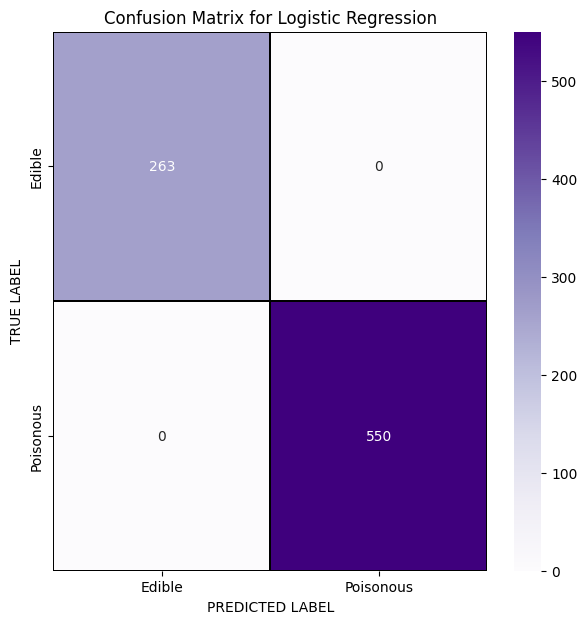

In [38]:
cm = confusion_matrix(ytest, y_pred_log)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')
#plt.savefig("svmcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# 5 Prediction

Based on the results, it's important to note that Decision Tree models with an accuracy of 1.0 may be overfitting the data. Therefore, it's better to choose a model with a slightly lower accuracy to avoid overfitting.

The Logistic Regression model with the highest accuracy is the one with C = 1.832981 and an accuracy of 1.0

To predict and test on the test data, you can train the model with the selected hyperparameter and use it to predict on the test set:

In [39]:
# Train the selected model with the optimal hyperparameter
optimal_logreg = LogisticRegression(C=1.832981, max_iter=1000000)
optimal_logreg.fit(xtrain, ytrain)

# Predict on the test data
y_pred_log = optimal_logreg.predict(xtest)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(ytest, y_pred_log)
print(f"accuracy: {test_accuracy}\n")
print("Logistic Regression report: \n\n", classification_report(ytest, y_pred_log))

accuracy: 1.0

Logistic Regression report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       550

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [40]:
preds = optimal_logreg.predict(xtest)
print(y_pred_log[:36])
print(ytest[:36].values)
# 0 - Edible
# 1 - Poisonous

[1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1]
[1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1]


# 7. Discussion:

1b. Explain which feature are the most indicative of edible mushrooms:

by looking at cramer's V we can see the association of columns, since the class column contains whether the mushroom is poisinous or edible so based on looking at the class column against the other it is possible to identify which are the most important features. these features have an association of <0.5: 'class', 'bruises?', 'odor', 'gill-size', 'gill-color','stalk-surface-above-ring', 'stalk-surface-below-ring','stalk-color-above-ring', 'stalk-color-below-ring', 'ring-type','spore-print-color'.



1c. Discuss the results of your best performing model. Would you trust it to classify a mushroom for you to eat? Why do you come to that conclusion? Do you think the data set is sufficient to classify the mushroom as edible or poisonous? Why do you believe your best performing model is the best model? Why do the other models perform worse?

I have an issue with overfitting with the models always being able to guess if the mushroom is edible or not. However the issue is to see if the data set was different or much larger if it would still be right. Therefore even if the results are good it is hard to say with complete certainty that the results are right due to the model or if it is becuase it can always guess the right answer. Therefore, i could trust it with this specific data set however i don't know if i could with generalised data. this can be seen by all the models with different hyperparametre and almost all of them having 100% accuracy. Yes i do think it can be however it would be better to have a larger data set. It was number one when sorting by accuracy hoever there were a lot of models with 100% accuracy so could use different models and not only that one. 

References: 

https://www.kdnuggets.com/2020/09/performance-machine-learning-model.html 

https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/

https://ai.plainenglish.io/mushroom-classification-using-machine-learning-with-deployment-using-fastapi-16ff80bc4cef

https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/